In [1]:
%matplotlib inline
import os, pickle
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

font_path = "/home/zhoujb/local/font/times.ttf"
mpl.font_manager.fontManager.addfont(font_path)
prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]

RAW_PATH = "/data2/zhoujb/project/cowpea_project/rawData/"
RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Result/"
CROSS_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Cross_Analysis_Results/rawCross/"
CROSS_RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Cross_Analysis_Results/CrossRes/"
RAW_CROSS_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Cross_Analysis_Results/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/plotFigure/"

In [4]:
p1_sel_list = ['D454', 'D580', 'D645', 'D640', 'D511', 'D443', 'D586', 'D376', 'D639']

raw_phenos = pd.read_excel(os.path.join(RAW_PATH, "Phenotypes for GWAS-upload public database.xlsx"), index_col="Accessions")
raw_phenos = raw_phenos.drop(columns="ID")
raw_phenos = raw_phenos.replace({"-":np.nan})
raw_phenos = raw_phenos.dropna(axis=0, how="all")
raw_phenos = raw_phenos.rename(columns={'HZ-Pod length':'HZ-PL', 'GZ-Pod length':'GZ-PL', 
                                        'HZ Pod Sugar content (mg/g)':'HZ-PSugar','GZ Pod Sugar content  (mg/g)':'GZ-PSugar', 
                                        'HZ Pod Starch content(mg/g)':'HZ-PStarch','GZ Pod Strach Content (mg/g)':'GZ-PStarch', 
                                        'HZ Pod Protein content(g/Kg)':'HZ-PProtein','GZ Pod protein  (g/Kg)':'GZ-PProtein', 
                                        'HZ Seed Sugar (mg/g)':'HZ-SSuger','GZ Seed Sugar (mg/g)':'GZ-SSuger', 
                                        'HZ Seed Starch (mg/g)':'HZ-SStarch','GZ Seed Starch (mg/g)':'GZ-SStarch', 
                                        'HZ Seed Protein (g/kg)':'HZ-SProtein','GZ Seed Protein (g/kg)':'GZ-SProtein', 
                                        'Pod shattering':'PS'})

detail_info = pd.read_excel(os.path.join(RAW_PATH, "Detail_information_344.xlsx"), index_col="Genotype No.")
detail_info["Type"] = detail_info["Types"].map({'Grain':"G", 'V-landrace':"VL", '-':"NA", 'V-cultivar':"VC"})

samples_score_info = pd.read_table(os.path.join(RES_PATH, "Samples_Score_Info.tsv"), index_col="Sample")
samples_score_info = samples_score_info.drop(columns=[ 'Class', 'Mis_Hap_Num'])
samples_score_info = samples_score_info.rename(columns={'Hap_Score.by_Total_pop':'Total_score', 
                                                        'Hap_Score.by_VL_pop':'VL_score',
                                                        'Hap_Score.by_G_pop':'G_score',
                                                        'Hap_Score.by_VC_pop':'VC_score'})
samples_score_info = samples_score_info[["Total_score"]]

inte_sample_list = list(set(raw_phenos.index.to_list()).intersection(detail_info.index.to_list()))
raw_phenos = raw_phenos.loc[inte_sample_list]
detail_info = detail_info.loc[inte_sample_list]
samples_score_info = samples_score_info.loc[inte_sample_list]
phenos_data = pd.concat([raw_phenos, detail_info[["Type"]], samples_score_info], axis=1)
phenos_data.loc[p1_sel_list, "SelectSample"] = "Yes"
phenos_data = phenos_data.replace({"SelectSample":{np.nan:"No"}})

In [6]:
phenos_data.columns

Index(['HZ-PL', 'GZ-PL', 'HZ-PSugar', 'GZ-PSugar', 'HZ-PStarch', 'GZ-PStarch',
       'HZ-PProtein', 'GZ-PProtein', 'HZ-SSuger', 'GZ-SSuger', 'HZ-SStarch',
       'GZ-SStarch', 'HZ-SProtein', 'GZ-SProtein', 'PS', 'HZ-TSW', 'GZ-TSW',
       'HZ-GNP', 'Type', 'Total_score', 'SelectSample'],
      dtype='object')

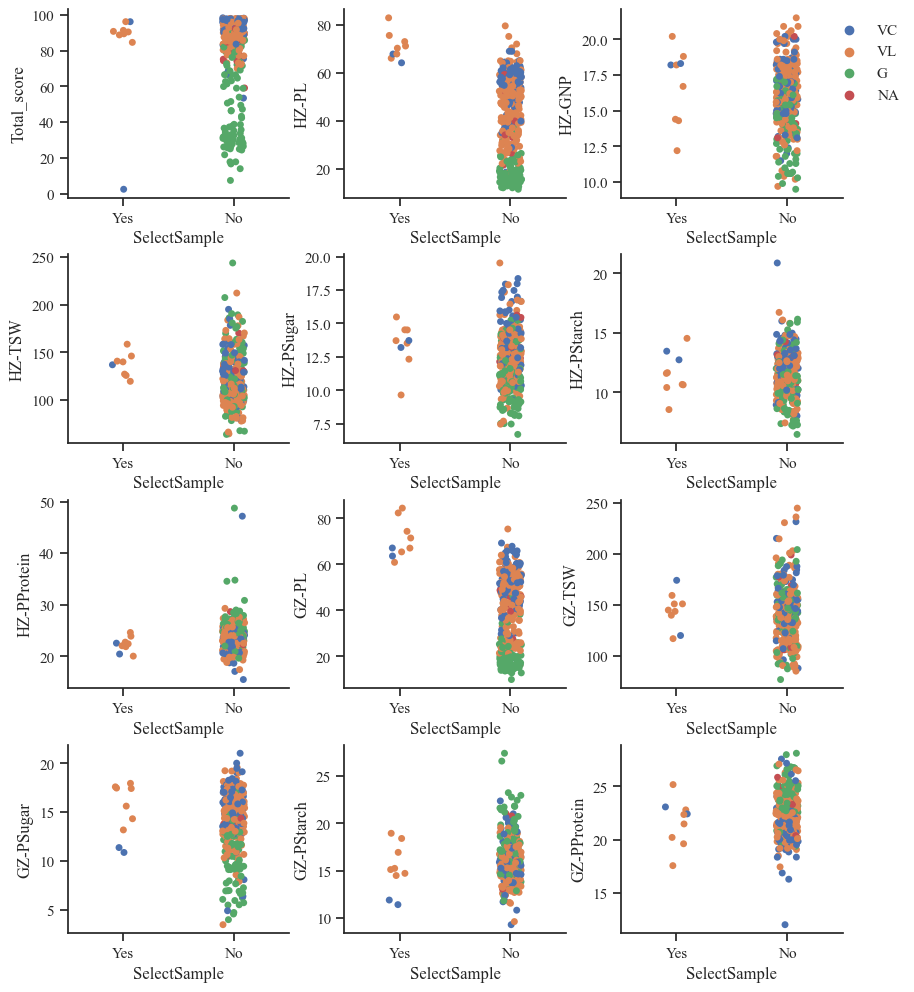

In [13]:
plot_col = ["Total_score", 'HZ-PL', 'HZ-GNP', 'HZ-TSW', 'HZ-PSugar', 'HZ-PStarch', 'HZ-PProtein', 
          'GZ-PL', 'GZ-TSW', 'GZ-PSugar', 'GZ-PStarch', 'GZ-PProtein']
sns.set(font_scale=1, style="ticks")

ncols = 3
fig, axes = plt.subplots(nrows=4, ncols=ncols, figsize=(10, 12))
fig.subplots_adjust(wspace=0.25, hspace=0.3)
for num in range(len(plot_col)):
    mpl.rcParams['font.family'] = prop.get_name()
    mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
    if num == ncols-1:
        sns.stripplot(data=phenos_data, x="SelectSample", y=plot_col[num], 
                           hue="Type", order=["Yes", "No"], hue_order=['VC', 'VL', 'G', 'NA'],ax=axes[num//ncols, num%ncols])
        axes[num//ncols, num%ncols].legend(bbox_to_anchor=(0.9, 1), frameon=False)
    else:
        sns.stripplot(data=phenos_data, x="SelectSample", y=plot_col[num], 
                      hue="Type", order=["Yes", "No"], hue_order=['VC', 'VL', 'G', 'NA'],
                      ax=axes[num//ncols, num%ncols], legend=None)
    axes[num//ncols, num%ncols].spines[['right', 'top']].set_visible(False)

plt.savefig(os.path.join(FIG_PATH, 'Fig_SI_plot_select_sample.pdf'), format='pdf', bbox_inches='tight', transparent=True)
#plt.savefig(os.path.join(FIG_PATH, 'Fig_2B_plot_p2_top10.svg'), format='svg', bbox_inches='tight', transparent=True)

In [12]:
phenos_data[phenos_data["SelectSample"]=="Yes"]

,HZ-PL,GZ-PL,HZ-PSugar,GZ-PSugar,HZ-PStarch,GZ-PStarch,HZ-PProtein,GZ-PProtein,HZ-SSuger,GZ-SSuger,...,GZ-SStarch,HZ-SProtein,GZ-SProtein,PS,HZ-TSW,GZ-TSW,HZ-GNP,Type,Total_score,SelectSample
D639,73.050000,67.10,13.518831,13.18785,10.625191,14.486125,24.642885,22.801132,92.625379,86.661387,...,257.511857,259.968750,274.535,0.0,146.24720,159.1574,12.2,VL,84.620705,Yes
D640,64.200000,67.15,13.721009,11.38020,12.731103,11.894758,22.573194,22.420532,83.475028,93.810891,...,257.221050,268.343750,284.600,0.0,137.04880,119.8874,18.2,VC,2.425889,Yes
D511,82.950000,82.40,14.520496,14.33250,14.536894,15.244750,22.444063,25.175441,92.002500,81.855151,...,230.171056,254.575000,274.810,0.0,140.90655,143.5172,18.2,VL,88.788132,Yes
D586,70.300000,71.50,13.711833,17.95560,11.589319,18.404483,22.069637,17.563624,73.443141,85.522911,...,315.669167,260.118750,272.510,0.0,127.25680,116.8207,14.4,VL,90.459673,Yes
D454,75.605556,60.90,14.512768,17.59680,10.404334,16.935400,20.061092,19.617837,90.135978,88.419588,...,217.777032,274.921875,252.030,0.0,158.67900,144.7768,20.2,VL,89.416281,Yes
D580,66.105556,65.45,9.646952,17.47200,8.547199,15.117108,22.772126,22.364855,67.775431,78.713668,...,266.057407,268.406250,282.440,0.0,125.86465,139.7351,18.8,VL,91.330241,Yes
D443,71.200000,74.40,15.481884,15.62535,10.662311,18.951175,21.891275,21.479259,81.637149,85.291084,...,239.143168,250.934375,259.980,0.0,119.69070,150.8548,16.7,VL,90.771596,Yes
D645,67.850000,63.65,13.199417,10.88100,13.457897,11.410683,20.464746,23.077281,93.220000,87.851037,...,289.219447,247.412500,278.205,0.0,NaN,173.9435,18.3,VC,96.194089,Yes
D376,67.875000,84.50,12.324896,17.42715,11.651042,14.717325,23.921173,20.213406,95.018041,88.338072,...,284.926816,271.301042,261.180,0.0,140.11320,150.8041,14.3,VL,96.211027,Yes


In [ ]:
D640